# 2. 선형회귀 2 사이킷런 실습
## 예제 데이터 불러오기

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../data/regression/compactiv.csv')
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

## 모델 학습
선형 회귀 모델은 사이킷런의 linear_model 모듈로 구현할 수 있으며, 이 모듈에는 LinearRegression, Ridge, Lasso, ElasticNet 이라는 클래스가 있습니다.

In [20]:
# 선형 회귀 모델 학습 예제
from sklearn.linear_model import *
LR = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
EN = ElasticNet().fit(X_train, y_train)

## 모델 평가
회귀 모델을 같은 방법으로 반복해서 평가해야 하므로 regression_model_test 라는 함수를 만들어 모델을 평가하겠습니다.

In [21]:
# 선형 회귀 모델 평가 예제
from sklearn.metrics import mean_absolute_error as MAE

def regression_model_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = MAE(y_test, y_pred)
    return mae

In [22]:
LR_mae = regression_model_test(LR, X_test, y_test)
ridge_mae = regression_model_test(ridge, X_test, y_test)
lasso_mae = regression_model_test(lasso, X_test, y_test)
EN_mae = regression_model_test(EN, X_test, y_test)
print(LR_mae, ridge_mae, lasso_mae, EN_mae)

6.046877193178113 6.046866381628065 6.0995197553503235 6.074987094435656


## 복잡도 하이퍼 파라미터 튜닝
Ridge와 Lasso 클래스는 모두 alpha라는 인자가 있는데, 이 인자는 손실 함수에서 계수 패널티에 대한 가중치를 나타냅니다.

In [23]:
# alpha에 따른 성능 측정 예시
Lasso1 = Lasso(alpha=0.1, random_state=2022).fit(X_train, y_train)
Lasso2 = Lasso(alpha=1, random_state=2022).fit(X_train, y_train)
Lasso3 = Lasso(alpha=10, random_state=2022).fit(X_train, y_train)

Lasso1_mae = regression_model_test(Lasso1, X_test, y_test)
Lasso2_mae = regression_model_test(Lasso2, X_test, y_test)
Lasso3_mae = regression_model_test(Lasso3, X_test, y_test)

print(Lasso1_mae, Lasso2_mae, Lasso3_mae)

6.044036480564693 6.0995197553503235 6.2038739785793755


- Lasso1_mae < Lasso2_mae < Lasso3_mae
- 즉, alpha가 작을수록 더 좋은 성능이 나옴

alpha를 0.05와 5로 각각 설정해 추가로 평가해보겠습니다

In [24]:
# alpha에 따른 성능 측정 예시
Lasso4 = Lasso(alpha=0.05, random_state=2022).fit(X_train, y_train)
Lasso5 = Lasso(alpha=5, random_state=2022).fit(X_train, y_train)

Lasso4_mae = regression_model_test(Lasso4, X_test, y_test)
Lasso5_mae = regression_model_test(Lasso5, X_test, y_test)

print(Lasso4_mae, Lasso5_mae)

6.045073780285436 6.181454840096413


alpha가 0.05일 때보다 0.1일 때의 성능이 더 좋으며, 1일 때보다 5일 때 성능이 더 좋지 않습니다. 5개의 alpha를 평가한 결과를 통해, 시드가 2022로 고정됐을 때 한해 최적의 alpha는 0.05와 1 사이에 있다고 할 수 있습니다.

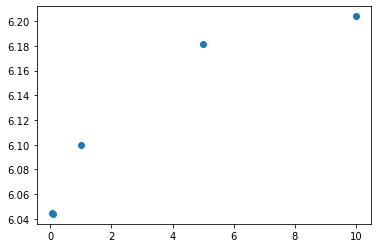

In [25]:
import matplotlib.pyplot as plt
alpha = [0.05, 0.1, 1, 5, 10]
mae_list = [Lasso4_mae, Lasso1_mae, Lasso2_mae, Lasso5_mae, Lasso3_mae]
plt.scatter(alpha, mae_list)

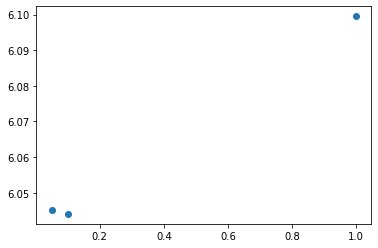

In [26]:
import matplotlib.pyplot as plt
alpha = [0.05, 0.1, 1]
mae_list = [Lasso4_mae, Lasso1_mae, Lasso2_mae]
plt.scatter(alpha, mae_list)

# 3. 로지스틱 회귀
## 모델 구조 및 특성
로지스텍 회귀는 특징이 주어졌을 때, 라벨이 1(긍정 클래스)일 확률을 다음과 같이 계산합니다.

![nn](images/logistic.png)

확률과 임계치 θ를 바탕으로 다음과 같이 분류 합니다.

![nn](images/logistic2.png)

## 예제 데이터 불러오기
분류 모델을 학습할 데이터를 불러오고 분리하겠습니다.

In [27]:
# 예제 데이터 불러오기
df = pd.read_csv('../../data/classification/ecoli1.csv')
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

## 로지스틱 회귀 모델 학습
로지스틱 회귀는 linear_model의 LogisticRegression 클래스로 구현할 수 있습니다.

주요인자

penalty
- 페널티 종류 : l1, l2, elasticnet, none
- 기본값 : l2

C
- 페널티 계수에 대한 가중치로 부여되는 페널티는 C에 반비례함
- 기본값 : 1.0

In [28]:
# 로지스틱 회귀 모델 학습 및 평가 예제
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)

0.7096774193548387


## 임계치에 따른 정밀도와 재현율 계산
클래스에 속할 확률 y_prob을 계산하고 모델의 클래스 정보 출력

In [29]:
y_prob = model.predict_proba(X_test)
print(model.classes_)

[0 1]


- 라인2: 분류 모델의 classes_ 속성은 분류 모델이 학습할 때 사용했던 클래스 목록을 반환합니다. 이 결과를 출력한 이유는 predict_proba 메서드가 반환한 배열의 i행j 열의 값이 샘플 i가 model.classes_[j]에 속할 확률이기 때문 입니다.

임계치에 따른 예측값 계산 예제

In [30]:
from sklearn.metrics import precision_score, recall_score

def precision_and_recall_accto_threshold(y_prob, y_test, threshold):
    y_prob_pred = (y_prob[:,1]>threshold).astype(int)
    precision = precision_score(y_test, y_prob_pred)
    recall = recall_score(y_test, y_prob_pred)
    return precision, recall

- 라인 4 : y_prob의1번째 열을 threshold와비교한 결과의 각요소를 int 형으로 바꾼 배열을 y_prob_pred에 저장 합니다. 즉, threshold보다 큰 값은 1이 되며, 그렇지 않은 값은 0이됩니다.
- 라인5 – 6 : y_prob_pred와y_test를바탕으로 재현율과 정밀도를계산합니다.


임계치에 따른 예측값 계산 예제

In [31]:
import numpy as np

precision_list = []
recall_list = []
threshold_list = np.arange(0, 1, 0.01)

for threshold in threshold_list:
    precision, recall = precision_and_recall_accto_threshold(y_prob, y_test, threshold)
    precision_list.append(precision)
    recall_list.append(recall)

c:\Users\rkfka\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rkfka\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rkfka\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rkfka\AppData\Local\Pr

- 라인 3 – 4 : 정밀도와 재현율을 담을 빈 리스트를 정의 합니다.
- 라인 5 : 0부터 0.01씩 1까지 늘린 값으로 구성된 배열을 threshold_list에 저장 합니다.
- 라인 7 – 8 : threshold를 0부터 0.01씩 늘려 가면서 precision_and_recall_accto_threshold를적용한 결과를 각각 precision_list와 recall_list에 추가합니다.

임계치에 따른 예측값 계산 결과 시각화

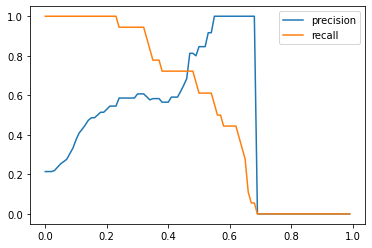

In [32]:
from matplotlib import pyplot as plt
plt.plot(threshold_list, precision_list, label='precision')
plt.plot(threshold_list, recall_list, label='recall')
plt.legend()
plt.show()

- 임계치와 정밀도는 비례하고 임계치와 재현율은 반비례함
- 임계치가 0.7 정도 되는 시점에서 긍정이라 분류하는 샘플이 하나도 없어 정밀도가 0이 됐음
- 임계치에 따라 정밀도가 계속 증가하지 않고 소폭 감소하기도 함


# 4. 선형성을 고려한 특징 공학
## 선형 모델의 한계
선형 모델은 선형적인 관계만 적절히 모델링할 수 있는 한계가 있습니다.

Text(0, 0.5, 'y')

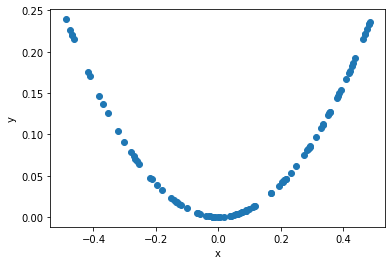

In [33]:
# 선형 모델의 한계 확인 예제
x = np.random.random(100)-0.5
y = x**2
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

- 라인 2 : np.random.random 함수는 0과 1 사이의 난수를 생성하므로 0.5를 빼서 -0.5와 0.5 사이로 x의 범위를 수정했습니다.
- 두 변수 간에는 𝑦=𝑥2이라는 자명한 관계가 있으므로 𝑥로 𝑦를 예측하기 매우 쉬워 보임


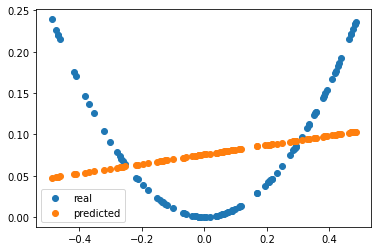

In [34]:
# 선형 모델의 한계 확인 에제
model = LinearRegression().fit(x.reshape(-1,1),y)
y_pred = model.predict(x.reshape(-1,1))
plt.scatter(x,y,label='real')
plt.scatter(x,y_pred,label='predicted')
plt.legend()
plt.show()

- 라인 1 : x와 y를 사용해 다중 선형 회귀 모델을 학습했습니다. 이때, x가 1차원인데 fit 메서드는 2차원 배열 형태의 특징 벡터를 입력 받으므로 reshape 메서드를 이용해 모양을 바꿨습니다.
- 실제 라벨의 분포인 파란색과 예측된 결과의 분포인 주황색이 크게 다름
- 이러한 결과가 나온 이유는 선형 회귀는 𝑤𝑥+𝑏형태의 구조로 𝑦를 예측하는데, 이 구조로는 𝑥2을 표현할 수 없기 때문

## 특징 변환 및 생성
선형 회귀 모델로 특징과 라벨 간 비선형 관계를 표현하는 새로운 특징을 추가하거나 기존 특징을 변환하는 것 입니다.

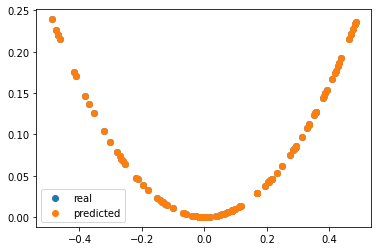

In [35]:
# 비선형 특징 예제
new_X = pd.DataFrame({'x':x, 'x_squared':x**2})
model = LinearRegression().fit(new_X, y)
y_pred = model.predict(new_X)
plt.scatter(x, y, label = "real")
plt.scatter(x, y_pred, label = "predicted")
plt.legend()
plt.show()

- 라인 1 : x와 x**2으로 구성된 새로운 데이터프레임 new_X를 생성 했습니다.
- 완벽하게 예측되어 주황색 점에 의해 파란색 점이 모두 가려졌음


현실적으로는 특징과 라벨 간 관계를 알 수 없으므로 미리 새로운 특징을 생성하는 함수를 통해 여러 개의 특징을 생성한 뒤 특징 선택을 통해 다시 차원을 줄여야 합니다.

- 특징과 라벨 간 관계를 정확히 알고 있다는 것 자체가 매우 비현실적임
- 각 특징을 라벨과 함께시각화하여 그 관계를 파악하고, 그 관계에 맞는 새로운 특징을 추가하는 것 역시 비현실적임
- 미리 새로운 특징을 생성하는 함수(예: 제곱, 루트, 지수 등)를 정의하고, 그 함수를 이용해 여러개의 특징을 생성한 뒤 특징 선택을 통해 다시 차원을 줄이는 방법이 있음